In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [17]:
# Define the objective or cost function to minimize
# If you are trying to maximize, then multiply by -1
def f(x):
    return (x-2)**2 + 2

In [15]:
# This is optional 
def f_prime(x):
    return 2*(x-2)

In [16]:
def f_pprime(x):
    return 2

In [11]:
initial_guess = 0
result = optimize.minimize(f,initial_guess)
result

      fun: -1.9999999999999993
 hess_inv: array([[0.49999999]])
      jac: array([-4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999997])

In [12]:
if result.success == True:
    min_x = result.x
else:
    min_x = None

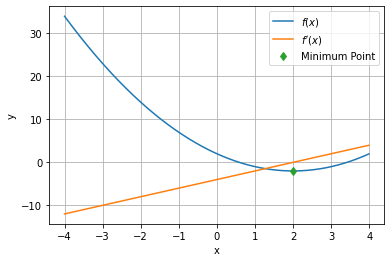

In [13]:
x = np.arange(-4,4,.01)
plt.plot(x,f(x),label="$f(x)$")
plt.plot(x,f_prime(x),label="$f^\prime(x)$")
if result.success == True:
    plt.plot(min_x,f(min_x),'d',label="Minimum Point")
plt.grid()
plt.xlabel("x")
plt.ylabel('y')
plt.legend();

In [18]:
if f_pprime(min_x) > 0:
    print("The stationary point is at a minimum.")
else:
    print("The stationary point is not at a minimum.")

The stationary point is at a minimum.
